<a href="https://colab.research.google.com/github/ArunK-ML/Project---TripFare-Predicting-Urban-Taxi-Fare-with-Machine-Learning/blob/main/TripFare_ML_All%20Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🚗 **TripFare : Predicting Urban Taxi Fare with Machine Learning**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Collection

df = pd.read_csv("/content/drive/MyDrive/DataSet_For DS/taxi_fare.csv")
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-03-01 00:00:00,2016-03-01 00:07:55,1,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,1,2016-03-01 00:00:00,2016-03-01 00:11:06,1,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,2,2016-03-01 00:00:00,2016-03-01 00:31:06,2,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,2,2016-03-01 00:00:00,2016-03-01 00:00:00,3,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,2,2016-03-01 00:00:00,2016-03-01 00:00:00,5,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212340,2,2016-03-01 12:15:37,2016-03-01 12:38:53,1,-73.955688,40.782261,1,N,-73.974915,40.751282,1,16.0,0.0,0.5,3.36,0.00,0.3,20.16
212341,2,2016-03-01 12:15:37,2016-03-01 12:38:22,1,-74.002197,40.715042,1,N,-73.976295,40.739609,1,15.5,0.0,0.5,2.00,0.00,0.3,18.30
212342,2,2016-03-01 12:15:37,2016-03-01 12:18:18,1,-73.991173,40.733170,1,N,-73.994324,40.728531,1,4.0,0.0,0.5,0.00,0.00,0.3,4.80
212343,1,2016-03-01 12:15:38,2016-03-01 12:22:47,2,-73.972099,40.786446,1,N,-73.955872,40.779755,2,7.0,0.0,0.5,0.00,0.00,0.3,7.80


In [3]:
df.shape

(212345, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212345 entries, 0 to 212344
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               212345 non-null  int64  
 1   tpep_pickup_datetime   212345 non-null  object 
 2   tpep_dropoff_datetime  212345 non-null  object 
 3   passenger_count        212345 non-null  int64  
 4   pickup_longitude       212345 non-null  float64
 5   pickup_latitude        212345 non-null  float64
 6   RatecodeID             212345 non-null  int64  
 7   store_and_fwd_flag     212345 non-null  object 
 8   dropoff_longitude      212345 non-null  float64
 9   dropoff_latitude       212345 non-null  float64
 10  payment_type           212345 non-null  int64  
 11  fare_amount            212345 non-null  float64
 12  extra                  212345 non-null  float64
 13  mta_tax                212345 non-null  float64
 14  tip_amount             212345 non-nu

In [5]:
df.describe()

,VendorID,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000
mean,1.708338,1.766493,-73.112122,40.279405,1.034152,-73.144178,40.295648,1.324943,12.665588,0.048077,0.497662,1.809357,0.329049,0.299637,15.649355
std,0.454529,1.469647,7.936633,4.370714,0.494699,7.794599,4.293031,0.478255,10.875584,0.148103,0.037436,2.507419,2.028199,0.014094,13.592129
min,1.000000,0.000000,-121.933327,0.000000,1.000000,-121.933327,0.000000,1.000000,-52.000000,-0.500000,-0.500000,-2.700000,0.000000,-0.300000,-52.800000
25%,1.000000,1.000000,-73.990891,40.740292,1.000000,-73.990570,40.740089,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.300000
50%,2.000000,1.000000,-73.979469,40.755989,1.000000,-73.978691,40.755508,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.620000
75%,2.000000,2.000000,-73.963295,40.770283,1.000000,-73.964645,40.767475,2.000000,14.500000,0.000000,0.500000,2.360000,0.000000,0.300000,17.160000
max,2.000000,6.000000,0.000000,42.786934,99.000000,0.000000,42.786934,4.000000,819.500000,4.500000,0.500000,218.950000,661.080000,0.300000,832.800000



--- Dataset Shape ---
(212345, 18)

--- First 5 Rows ---
   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2016-03-01 00:00:00   2016-03-01 00:07:55                1   
1         1  2016-03-01 00:00:00   2016-03-01 00:11:06                1   
2         2  2016-03-01 00:00:00   2016-03-01 00:31:06                2   
3         2  2016-03-01 00:00:00   2016-03-01 00:00:00                3   
4         2  2016-03-01 00:00:00   2016-03-01 00:00:00                5   

   pickup_longitude  pickup_latitude  RatecodeID store_and_fwd_flag  \
0        -73.976746        40.765152           1                  N   
1        -73.983482        40.767925           1                  N   
2        -73.782021        40.644810           1                  N   
3        -73.863419        40.769814           1                  N   
4        -73.971741        40.792183           3                  N   

   dropoff_longitude  dropoff_latitude  payment_type  fare_amoun

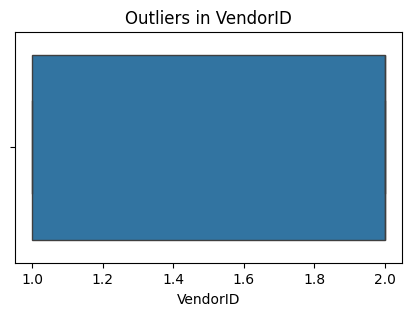

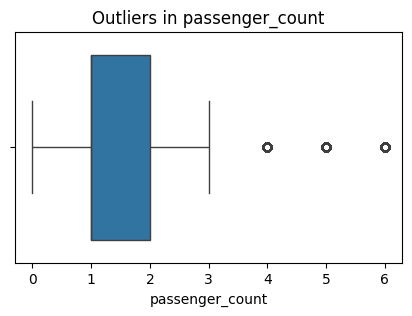

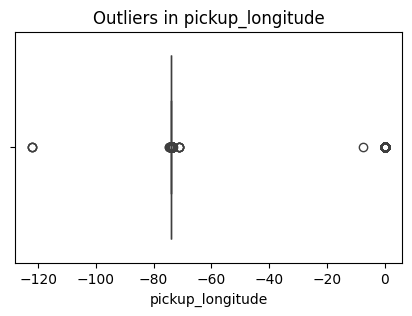

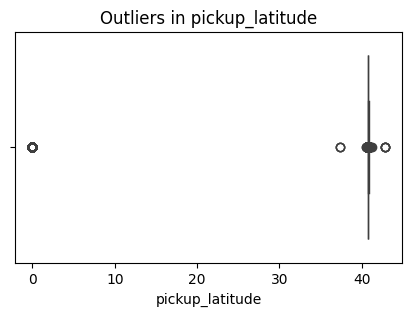

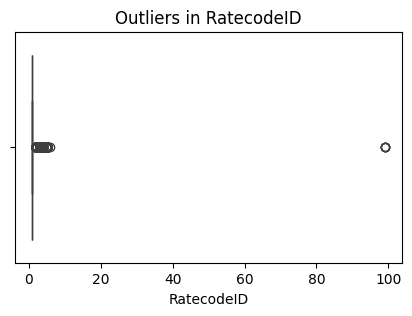

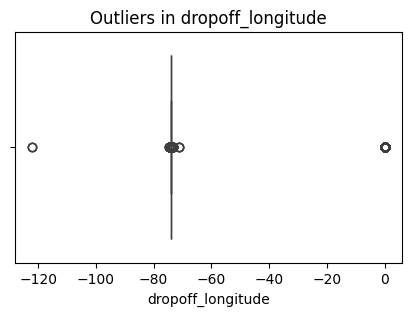

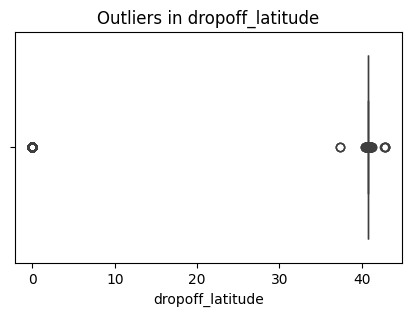

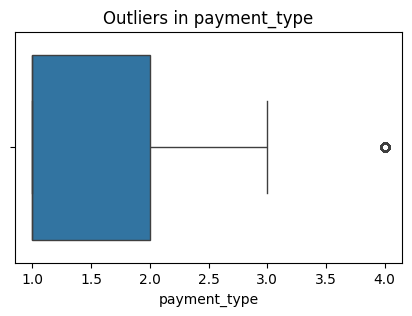

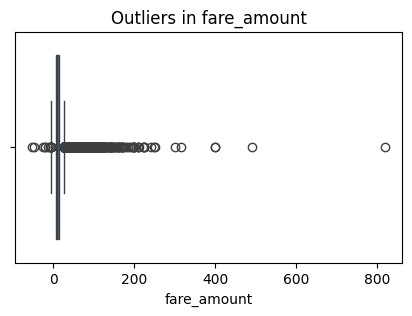

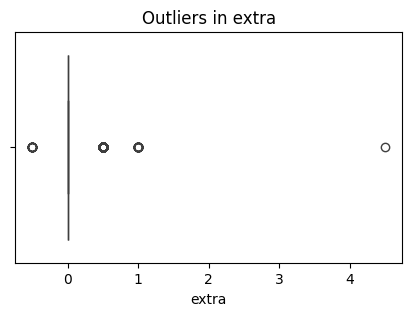

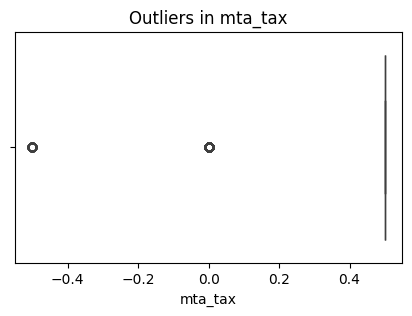

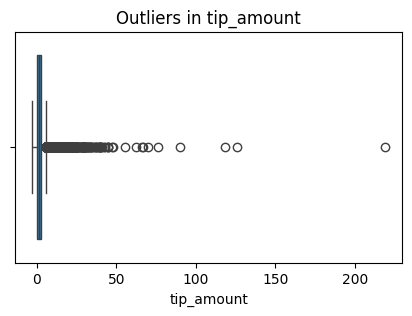

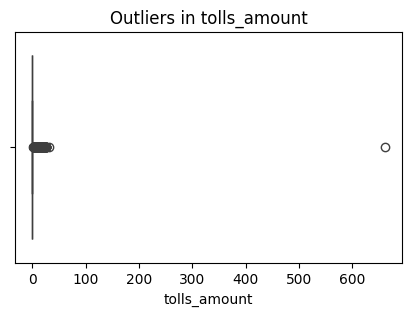

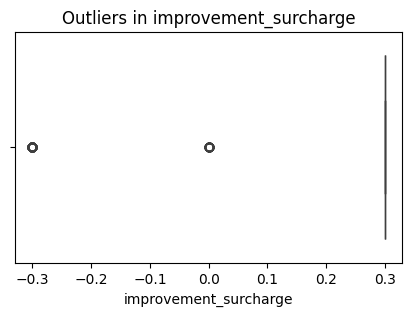

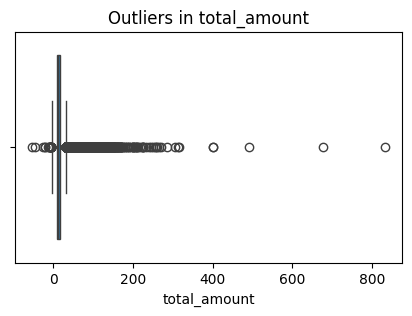

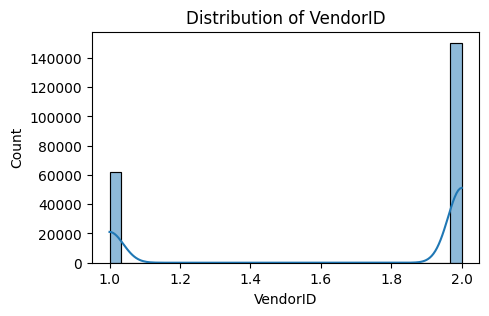

VendorID Skewness: -0.9167225274175435


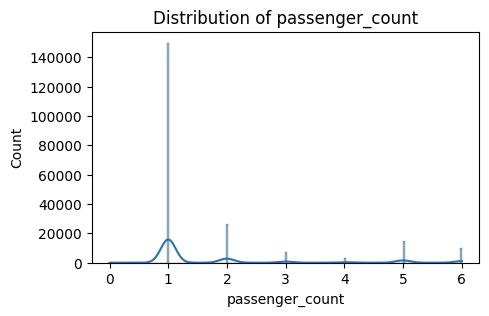

passenger_count Skewness: 1.8869268594193958


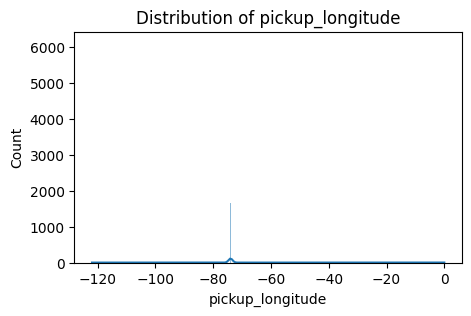

pickup_longitude Skewness: 9.0949892492652


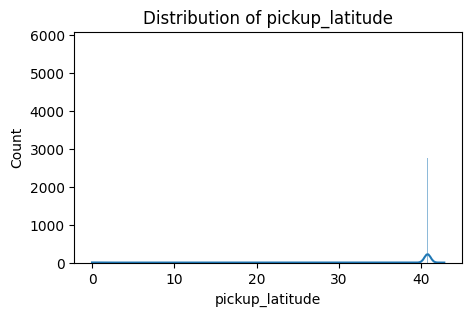

pickup_latitude Skewness: -9.106780592444323


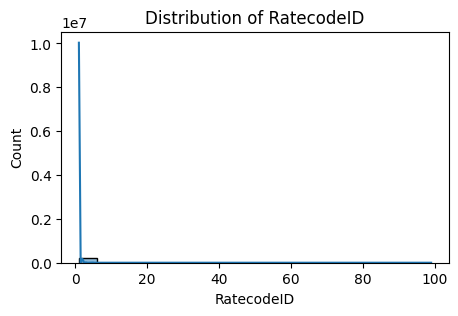

RatecodeID Skewness: 147.76598253461898


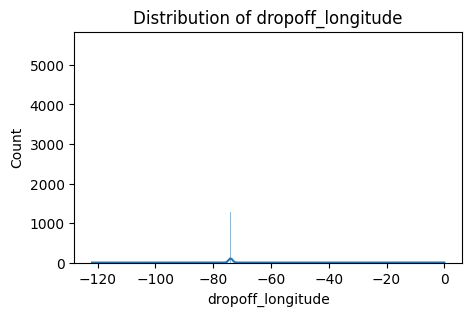

dropoff_longitude Skewness: 9.26882351247487


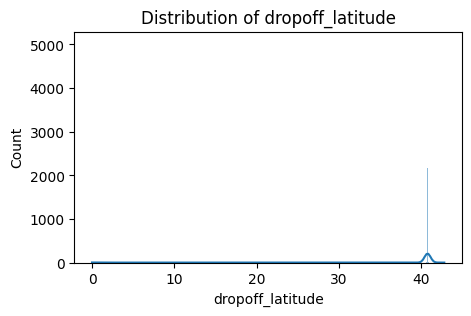

dropoff_latitude Skewness: -9.279208694176344


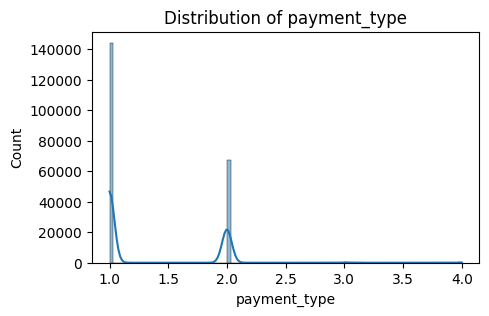

payment_type Skewness: 0.92335919408155


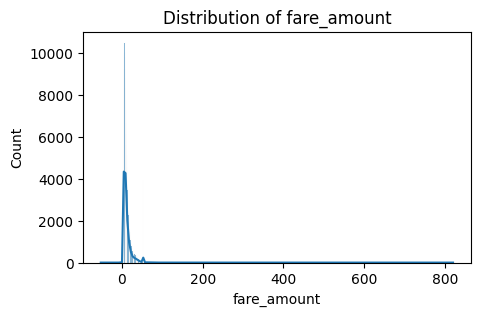

fare_amount Skewness: 6.07785761974816


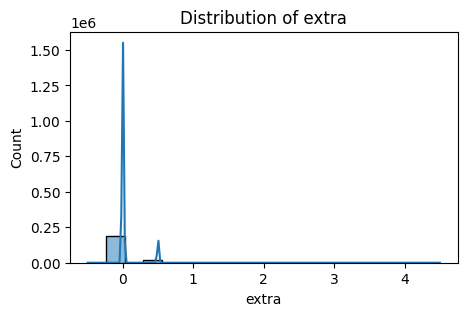

extra Skewness: 2.8581763913512037


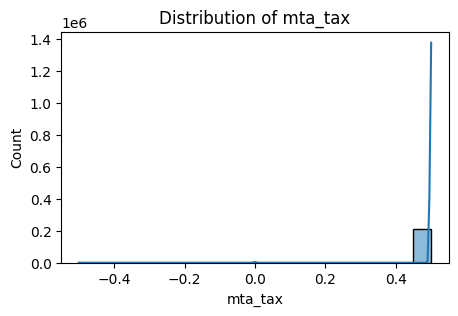

mta_tax Skewness: -17.7536844427196


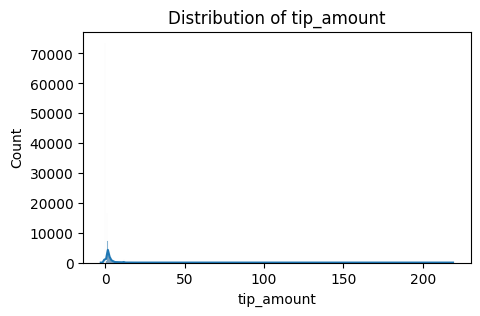

tip_amount Skewness: 7.663412662194823


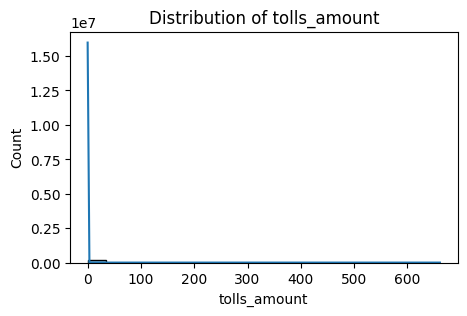

tolls_amount Skewness: 164.71407762337606


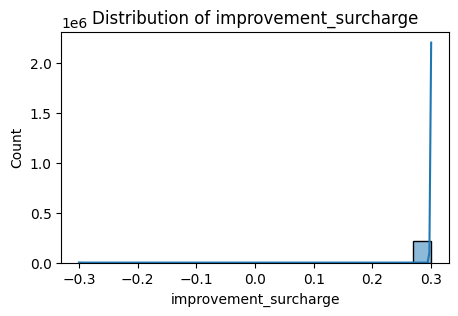

improvement_surcharge Skewness: -40.47779156933497


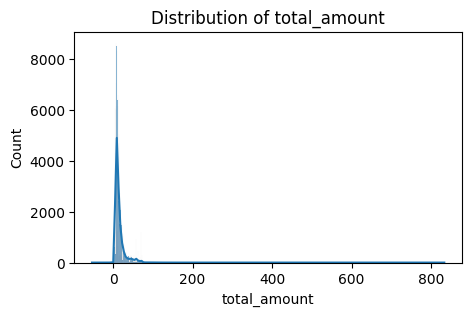

total_amount Skewness: 5.271096669537903


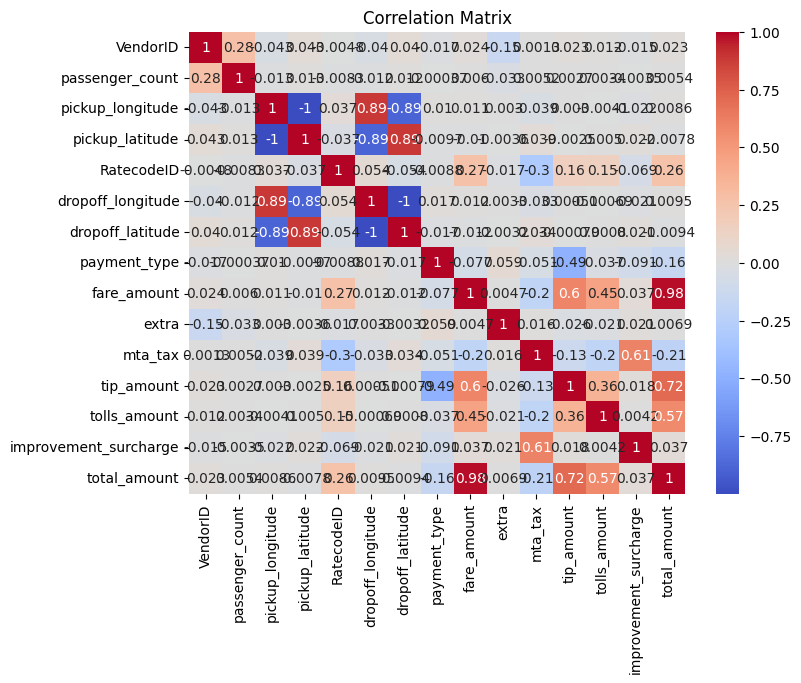


--- VIF ---
                  Feature           VIF
0                VendorID  1.642371e+01
1         passenger_count  2.649243e+00
2        pickup_longitude  2.134180e+05
3         pickup_latitude  2.136675e+05
4              RatecodeID  6.113890e+00
5       dropoff_longitude  3.037868e+05
6        dropoff_latitude  3.039988e+05
7            payment_type  1.215973e+01
8             fare_amount  2.160633e+07
9                   extra  1.880975e+03
10                mta_tax  1.964305e+04
11             tip_amount  7.412190e+05
12           tolls_amount  3.273036e+05
13  improvement_surcharge  7.400062e+03
14           total_amount  3.330900e+07

--- Target Variable Info ---


KeyError: 'your_target_column'

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor

# --------------------------
# 1. Load Data
# --------------------------
df = pd.read_csv("/content/drive/MyDrive/DataSet_For DS/taxi_fare.csv")

print("\n--- Dataset Shape ---")
print(df.shape)

print("\n--- First 5 Rows ---")
print(df.head())

# --------------------------
# 2. Structure & Schema
# --------------------------
print("\n--- Data Types ---")
print(df.dtypes)

print("\n--- Missing Values ---")
print(df.isnull().sum())

print("\n--- Duplicate Rows ---")
print(df.duplicated().sum())

# --------------------------
# 3. Outliers Detection (Numeric Columns)
# --------------------------
numeric_cols = df.select_dtypes(include=np.number).columns
for col in numeric_cols:
    plt.figure(figsize=(5,3))
    sns.boxplot(x=df[col])
    plt.title(f"Outliers in {col}")
    plt.show()

# --------------------------
# 4. Distribution & Skewness
# --------------------------
for col in numeric_cols:
    plt.figure(figsize=(5,3))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()
    print(f"{col} Skewness: {skew(df[col].dropna())}")

# --------------------------
# 5. Correlation Between Features
# --------------------------
plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# --------------------------
# 6. Variance Inflation Factor (Multicollinearity)
# --------------------------
if len(numeric_cols) > 1:
    X = df[numeric_cols].dropna()
    vif_df = pd.DataFrame()
    vif_df["Feature"] = X.columns
    vif_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    print("\n--- VIF ---")
    print(vif_df)

# --------------------------
# 7. Target Variable Check
# --------------------------
target = "your_target_column"  # Change to your target column
print("\n--- Target Variable Info ---")
print(df[target].value_counts())

if df[target].dtype == 'object':
    sns.countplot(x=target, data=df)
    plt.title("Target Class Distribution")
    plt.show()
else:
    sns.histplot(df[target], kde=True)
    plt.title("Target Distribution")
    plt.show()

# --------------------------
# 8. Categorical Features Check
# --------------------------
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    print(f"\n{col} - Unique Categories: {df[col].nunique()}")
    print(df[col].value_counts().head())

# --------------------------
# 9. Save Clean Report
# --------------------------
report = {
    "shape": df.shape,
    "missing_values": df.isnull().sum().to_dict(),
    "duplicate_rows": int(df.duplicated().sum()),
    "numeric_columns": list(numeric_cols),
    "categorical_columns": list(cat_cols)
}
pd.Series(report).to_json("data_quality_report.json")
print("\nData quality report saved as 'data_quality_report.json'")


# ** Preprocessing**

In [ ]:
# Change dtype

df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], format='%Y-%m-%d %H:%M:%S')

df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'], format='%Y-%m-%d %H:%M:%S')

In [ ]:
df.dtypes

,0
VendorID,int64
tpep_pickup_datetime,datetime64[ns]
tpep_dropoff_datetime,datetime64[ns]
passenger_count,int64
pickup_longitude,float64
pickup_latitude,float64
RatecodeID,int64
store_and_fwd_flag,object
dropoff_longitude,float64
dropoff_latitude,float64


In [ ]:
df.duplicated().sum() # No duplicate

np.int64(0)

In [ ]:
df.isna().sum() # No missing values

,0
VendorID,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
passenger_count,0
pickup_longitude,0
pickup_latitude,0
RatecodeID,0
store_and_fwd_flag,0
dropoff_longitude,0
dropoff_latitude,0


**Feature Engineering**

In [ ]:
import numpy as np

# Haversine formula function
def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371  # Earth's radius in km
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    return R * c

# Apply to your DataFrame
df["trip_distance_km"] = haversine_distance(
    df["pickup_latitude"],
    df["pickup_longitude"],
    df["dropoff_latitude"],
    df["dropoff_longitude"]
)

In [ ]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_distance_km
0,1,2016-03-01 00:00:00,2016-03-01 00:07:55,1,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35,3.138096
1,1,2016-03-01 00:00:00,2016-03-01 00:11:06,1,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35,4.303331
2,2,2016-03-01 00:00:00,2016-03-01 00:31:06,2,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80,16.600142
3,2,2016-03-01 00:00:00,2016-03-01 00:00:00,3,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62,9.046547
4,2,2016-03-01 00:00:00,2016-03-01 00:00:00,5,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80,20.400022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212340,2,2016-03-01 12:15:37,2016-03-01 12:38:53,1,-73.955688,40.782261,1,N,-73.974915,40.751282,1,16.0,0.0,0.5,3.36,0.00,0.3,20.16,3.806279
212341,2,2016-03-01 12:15:37,2016-03-01 12:38:22,1,-74.002197,40.715042,1,N,-73.976295,40.739609,1,15.5,0.0,0.5,2.00,0.00,0.3,18.30,3.496576
212342,2,2016-03-01 12:15:37,2016-03-01 12:18:18,1,-73.991173,40.733170,1,N,-73.994324,40.728531,1,4.0,0.0,0.5,0.00,0.00,0.3,4.80,0.580119
212343,1,2016-03-01 12:15:38,2016-03-01 12:22:47,2,-73.972099,40.786446,1,N,-73.955872,40.779755,2,7.0,0.0,0.5,0.00,0.00,0.3,7.80,1.555737


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212345 entries, 0 to 212344
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               212345 non-null  int64         
 1   tpep_pickup_datetime   212345 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  212345 non-null  datetime64[ns]
 3   passenger_count        212345 non-null  int64         
 4   pickup_longitude       212345 non-null  float64       
 5   pickup_latitude        212345 non-null  float64       
 6   RatecodeID             212345 non-null  int64         
 7   store_and_fwd_flag     212345 non-null  object        
 8   dropoff_longitude      212345 non-null  float64       
 9   dropoff_latitude       212345 non-null  float64       
 10  payment_type           212345 non-null  int64         
 11  fare_amount            212345 non-null  float64       
 12  extra                  212345 non-null  floa

In [ ]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude', 'RatecodeID',
       'store_and_fwd_flag', 'dropoff_longitude', 'dropoff_latitude',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount',
       'trip_distance_km'],
      dtype='object')

In [ ]:
# Extract AM/PM
df['pickup_am_pm'] = df['tpep_pickup_datetime'].dt.strftime('%p')

In [ ]:
# Ensure pickup_hour is extracted
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

# Binary flag for night trips
df['is_night'] = df['pickup_hour'].apply(
    lambda x: 1 if (x >= 22 or x <= 5) else 0
)

In [ ]:
import pytz

# Step 1: Localize as UTC
df['tpep_pickup_datetime'] = df['tpep_pickup_datetime'].dt.tz_localize('UTC')

# Step 2: Convert to US/Eastern (EDT/EST based on date)
df['tpep_pickup_datetime_(EDT)'] = df['tpep_pickup_datetime'].dt.tz_convert('US/Eastern')

# Step 1: Localize as UTC
df['tpep_dropoff_datetime'] = df['tpep_dropoff_datetime'].dt.tz_localize('UTC')

# Step 2: Convert to US/Eastern (EDT/EST based on date)
df['tpep_dropoff_datetime_(EDT)'] = df['tpep_dropoff_datetime'].dt.tz_convert('US/Eastern')



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212345 entries, 0 to 212344
Data columns (total 24 columns):
 #   Column                       Non-Null Count   Dtype                     
---  ------                       --------------   -----                     
 0   VendorID                     212345 non-null  int64                     
 1   tpep_pickup_datetime         212345 non-null  datetime64[ns, UTC]       
 2   tpep_dropoff_datetime        212345 non-null  datetime64[ns, UTC]       
 3   passenger_count              212345 non-null  int64                     
 4   pickup_longitude             212345 non-null  float64                   
 5   pickup_latitude              212345 non-null  float64                   
 6   RatecodeID                   212345 non-null  int64                     
 7   store_and_fwd_flag           212345 non-null  object                    
 8   dropoff_longitude            212345 non-null  float64                   
 9   dropoff_latitude          

In [ ]:
df = df.drop(columns=["pickup_longitude","pickup_latitude","dropoff_longitude","dropoff_latitude"])

In [ ]:
df.duplicated().sum()

np.int64(0)

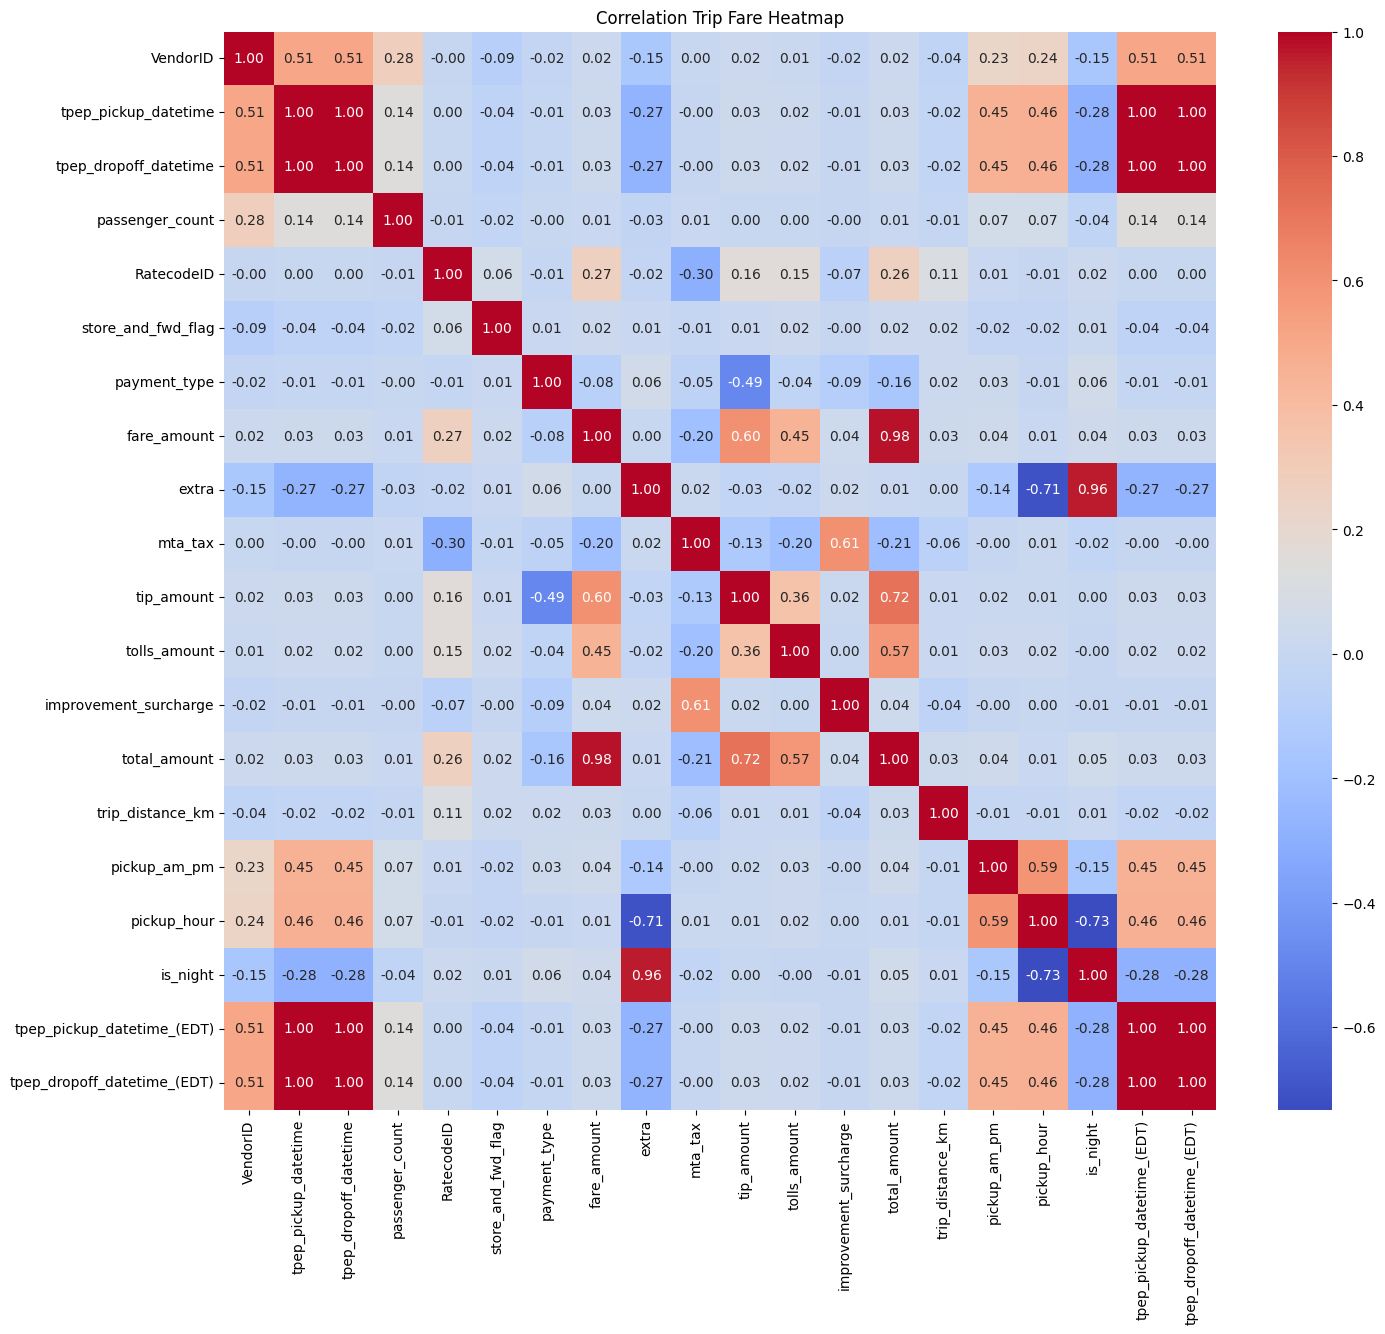

In [ ]:

df_copy = df.copy()

# Encode Categorical Data

from sklearn.preprocessing import LabelEncoder
code = LabelEncoder()

for i in df_copy.select_dtypes(include="object").columns:
  df_copy[i] = code.fit_transform(df_copy[i])


# -----------------------------------------------------------------------------
#                               Correlation Test
# ---------------------------------------------------------------------------

import seaborn as sns
import matplotlib.pyplot as plt

# ----------------------------------------
# Calculate correlation for Trip Fare
# ----------------------------------------
corr = df_copy.corr()

# Plot heatmap
plt.figure(figsize=(16, 14))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Trip Fare Heatmap")
plt.show()



# ** Exploratory Data Analysis (EDA)**

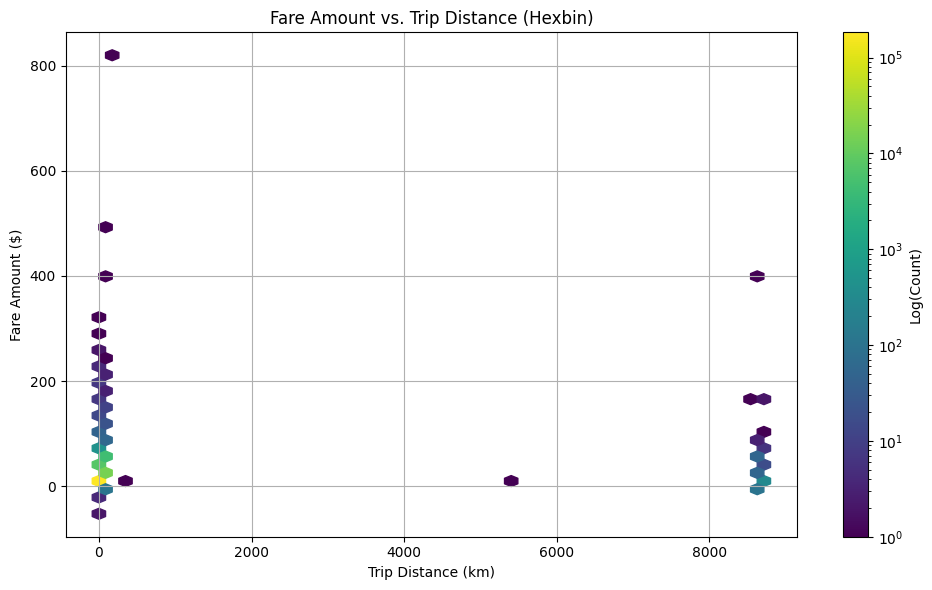

In [ ]:
#  Fare vs. Distance: Exploratory Data Analysis

# ----------------------------
# Step 3: Scatter Plot (Fare vs. Distance)
# ----------------------------
plt.figure(figsize=(10, 6))
plt.hexbin(
    df['trip_distance_km'],
    df['fare_amount'],
    gridsize=50,
    cmap='viridis',
    bins='log'
)
plt.colorbar(label='Log(Count)')
plt.title('Fare Amount vs. Trip Distance (Hexbin)')
plt.xlabel('Trip Distance (km)')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

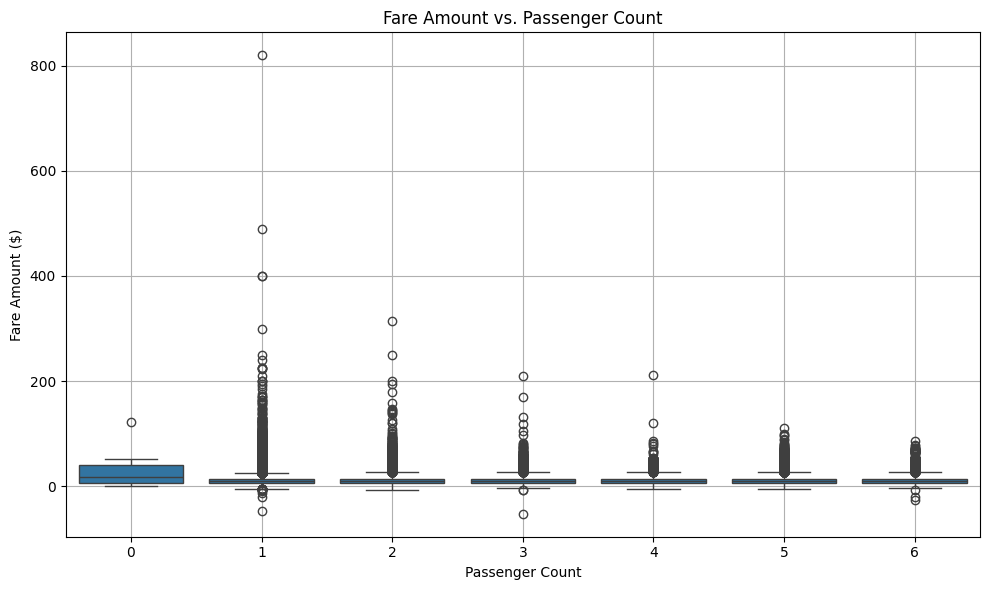

In [ ]:
# ----------------------------
# Plot: Fare vs. Passenger Count
# ----------------------------
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='passenger_count', y='fare_amount')
plt.title('Fare Amount vs. Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

# **Hypothesis testing**

In [ ]:
df.to_csv("taxi_fare_cleaned.csv")

In [ ]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'RatecodeID', 'store_and_fwd_flag', 'payment_type',
       'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'trip_distance_km',
       'pickup_am_pm', 'pickup_hour', 'is_night', 'tpep_pickup_datetime_(EDT)',
       'tpep_dropoff_datetime_(EDT)'],
      dtype='object')

In [ ]:
catergory = [
       'passenger_count', 'RatecodeID','store_and_fwd_flag',
       'payment_type','improvement_surcharge', 'total_amount',
        'pickup_am_pm', 'is_night']

continous = ['VendorID',
            'fare_amount', 'extra', 'mta_tax', 'tip_amount','tolls_amount',
             'trip_distance_km','pickup_hour'
             ]

# **Data Transformation**

In [ ]:

from scipy import stats

#continious vs continious
def two_sample(d1,d2):
  t=0
  f=0
  for i in  range(31):
    sample1=d1.sample(frac=0.03)
    sample2=d2.sample(frac=0.03)
    t_test,p_value=stats.ttest_ind(sample1,sample2)
    if p_value < 0.1:
      f=f+1
    else:
      t=t+1
  if t>f:
    return True
  else:
    return False


In [ ]:


#cat vs cat
def chisquare_cat_vs_cat(d1,d2):
    return True if stats.chi2_contingency(pd.crosstab(d1,d2))[1] < 0.1 else False

In [ ]:
#continious(d1) vs cat(d2)
def annova_test(d1,d2):
    group= df[d2].unique()
    data = {}
    for i in group:
        # Check if the category has more than one data point
        if len(df[d1][df[d2]==i]) > 1:
            data[i]=df[d1][df[d2]==i]
    # Check if there are at least two groups with more than one data point
    if len(data) < 2:
        return False  # Cannot perform ANOVA with less than two groups
    f_value,p_value=stats.f_oneway(*[i for i in data.values()])
    return False if p_value < 0.1 else True


In [ ]:

final = {}
for i in df.columns:
    final[i]={}
    for j in df.columns:
        if (i in continous) and (j in continous):
            result=two_sample(df[i],df[j])
        elif (i in continous) and (j in catergory):
            result=annova_test(i,j)
        elif (i in catergory) and (j in continous):
            result=annova_test(j,i)
        elif (i in catergory) and (j in catergory):
            result=chisquare_cat_vs_cat(df[i],df[j])
        if result:
            final[i][j]=1
        else:
            final[i][j]=0

In [ ]:
final_df = pd.DataFrame(final)
final_df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_distance_km,pickup_am_pm,pickup_hour,is_night,tpep_pickup_datetime_(EDT),tpep_dropoff_datetime_(EDT)
VendorID,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
tpep_pickup_datetime,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
tpep_dropoff_datetime,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
passenger_count,0,0,0,1,1,1,1,0,0,0,0,0,1,1,0,1,0,1,1,1
RatecodeID,0,0,0,1,1,1,1,0,0,0,0,0,1,1,0,1,0,1,1,1
store_and_fwd_flag,0,0,0,1,1,1,1,0,0,0,0,0,1,1,0,1,0,1,1,1
payment_type,0,0,0,1,1,1,1,0,0,0,0,0,1,1,0,1,0,1,1,1
fare_amount,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1
extra,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1
mta_tax,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


<Axes: >

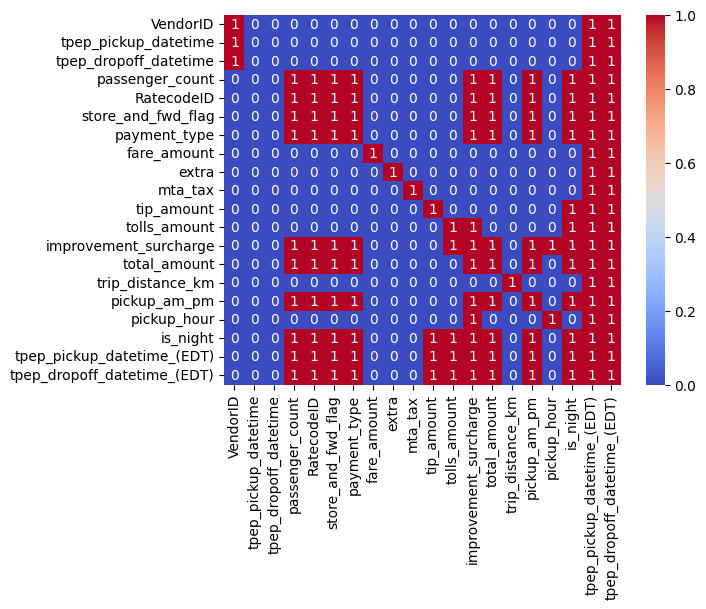

In [ ]:
import seaborn as sns
sns.heatmap(final_df,annot=True,cmap="coolwarm")

# **Train the model ML**

In [ ]:
df_copy.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'RatecodeID', 'store_and_fwd_flag', 'payment_type',
       'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'trip_distance_km',
       'pickup_am_pm', 'pickup_hour', 'is_night', 'tpep_pickup_datetime_(EDT)',
       'tpep_dropoff_datetime_(EDT)'],
      dtype='object')

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212345 entries, 0 to 212344
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype                     
---  ------                       --------------   -----                     
 0   VendorID                     212345 non-null  int64                     
 1   tpep_pickup_datetime         212345 non-null  datetime64[ns, UTC]       
 2   tpep_dropoff_datetime        212345 non-null  datetime64[ns, UTC]       
 3   passenger_count              212345 non-null  int64                     
 4   RatecodeID                   212345 non-null  int64                     
 5   store_and_fwd_flag           212345 non-null  int64                     
 6   payment_type                 212345 non-null  int64                     
 7   fare_amount                  212345 non-null  float64                   
 8   extra                        212345 non-null  float64                   
 9   mta_tax                   

In [ ]:
y = df_copy['total_amount']
x = df_copy.drop('total_amount',axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((159258, 19), (53087, 19), (159258,), (53087,))

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score

# Drop datetime columns before training
x_train = x_train.drop(columns=['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'tpep_pickup_datetime_(EDT)', 'tpep_dropoff_datetime_(EDT)'])
x_test = x_test.drop(columns=['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'tpep_pickup_datetime_(EDT)', 'tpep_dropoff_datetime_(EDT)'])

model = RandomForestRegressor().fit(x_train,y_train)
y_pred = model.predict(x_test)
print(mean_absolute_error(y_test,y_pred))
print(mean_absolute_percentage_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

0.022797737675931486
1527017787.6448643
0.17283819610959278
0.9990326815683305
